### Project: Involuntary Churn Rate Analysis
### Data: created randomly - the result is NOT accurate since it is not real data
### Date: 2021-04-29
### Author: J. G. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plan = pd.read_csv('plan.csv')
plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   customerID  int64 
 1   monthlyFee  int64 
 2   ratePlan    object
 3   market      object
 4   channel     object
 5   startDate   object
 6   cancelType  object
 7   cancelDate  object
dtypes: int64(2), object(6)
memory usage: 152.6+ MB


In [3]:
plan['startDate'] = plan['startDate'].astype('datetime64')
plan['cancelDate'] = plan['cancelDate'].astype('datetime64')
plan

,customerID,monthlyFee,ratePlan,market,channel,startDate,cancelType,cancelDate
0,1,80,Top,Brampton,Chain,2019-11-15,V,2020-07-30
1,2,45,Middle,Brampton,Store,2018-01-19,N,NaT
2,3,115,Top,Winnipeg,Dealer,2017-12-16,N,NaT
3,4,95,Top,Calgary,Chain,2015-05-28,N,NaT
4,5,60,Middle,Brampton,Mail,2020-11-15,N,NaT
...,...,...,...,...,...,...,...,...
2499995,2499996,35,Bottom,Hamilton,Dealer,2018-03-06,N,NaT
2499996,2499997,120,Top,Edmonton,Dealer,2013-11-06,N,NaT
2499997,2499998,145,Top,Mississauga,Chain,2020-11-14,N,NaT
2499998,2499999,195,Top,Mississauga,Chain,2018-03-22,N,NaT


In [4]:
plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   customerID  int64         
 1   monthlyFee  int64         
 2   ratePlan    object        
 3   market      object        
 4   channel     object        
 5   startDate   datetime64[ns]
 6   cancelType  object        
 7   cancelDate  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 152.6+ MB


In [5]:
plan[plan['cancelType'].isin(['V', 'I'])]

,customerID,monthlyFee,ratePlan,market,channel,startDate,cancelType,cancelDate
0,1,80,Top,Brampton,Chain,2019-11-15,V,2020-07-30
35,36,45,Middle,Edmonton,Chain,2020-04-18,I,2021-06-05
126,127,85,Top,Hamilton,Store,2016-05-11,I,2018-05-26
132,133,45,Middle,Calgary,Dealer,2019-06-26,V,2021-10-14
141,142,100,Top,Brampton,Dealer,2018-09-11,V,2018-12-10
...,...,...,...,...,...,...,...,...
2499908,2499909,70,Middle,Edmonton,Dealer,2016-02-14,V,2017-04-26
2499910,2499911,70,Middle,Toronto,Chain,2018-01-06,V,2019-11-22
2499914,2499915,45,Middle,Montreal,Dealer,2019-05-16,V,2020-07-27
2499932,2499933,90,Top,Calgary,Mail,2018-12-14,V,2019-11-19


In [6]:
plan[(plan['cancelDate']>'2021-05-01')]

,customerID,monthlyFee,ratePlan,market,channel,startDate,cancelType,cancelDate
35,36,45,Middle,Edmonton,Chain,2020-04-18,I,2021-06-05
132,133,45,Middle,Calgary,Dealer,2019-06-26,V,2021-10-14
931,932,130,Top,Brampton,Chain,2020-07-31,I,2021-12-30
935,936,190,Top,Winnipeg,Dealer,2020-09-05,V,2022-03-12
1372,1373,65,Middle,Ottawa,Store,2020-06-30,V,2021-05-11
...,...,...,...,...,...,...,...,...
2499026,2499027,190,Top,Calgary,Dealer,2020-06-22,V,2022-07-27
2499310,2499311,70,Middle,Montreal,Store,2020-05-26,V,2022-01-10
2499365,2499366,45,Middle,Toronto,Store,2019-09-23,V,2021-09-08
2499585,2499586,65,Middle,Calgary,Mail,2020-08-05,V,2022-04-14


In [7]:
plan[(plan['cancelDate']>'2021-01-01') & (plan['startDate']>'2015-10-01')]

,customerID,monthlyFee,ratePlan,market,channel,startDate,cancelType,cancelDate
35,36,45,Middle,Edmonton,Chain,2020-04-18,I,2021-06-05
132,133,45,Middle,Calgary,Dealer,2019-06-26,V,2021-10-14
931,932,130,Top,Brampton,Chain,2020-07-31,I,2021-12-30
935,936,190,Top,Winnipeg,Dealer,2020-09-05,V,2022-03-12
1372,1373,65,Middle,Ottawa,Store,2020-06-30,V,2021-05-11
...,...,...,...,...,...,...,...,...
2499026,2499027,190,Top,Calgary,Dealer,2020-06-22,V,2022-07-27
2499310,2499311,70,Middle,Montreal,Store,2020-05-26,V,2022-01-10
2499365,2499366,45,Middle,Toronto,Store,2019-09-23,V,2021-09-08
2499585,2499586,65,Middle,Calgary,Mail,2020-08-05,V,2022-04-14


In [8]:
# drop customers with cancel date after 2021-05-01 since data is wrong as it is April 2021 now.
# simply drop since the data was created randomly, which is not real data.
plan = plan[(plan['cancelType']=='N') | (plan['cancelDate']<'2021-05-01')]
plan

,customerID,monthlyFee,ratePlan,market,channel,startDate,cancelType,cancelDate
0,1,80,Top,Brampton,Chain,2019-11-15,V,2020-07-30
1,2,45,Middle,Brampton,Store,2018-01-19,N,NaT
2,3,115,Top,Winnipeg,Dealer,2017-12-16,N,NaT
3,4,95,Top,Calgary,Chain,2015-05-28,N,NaT
4,5,60,Middle,Brampton,Mail,2020-11-15,N,NaT
...,...,...,...,...,...,...,...,...
2499995,2499996,35,Bottom,Hamilton,Dealer,2018-03-06,N,NaT
2499996,2499997,120,Top,Edmonton,Dealer,2013-11-06,N,NaT
2499997,2499998,145,Top,Mississauga,Chain,2020-11-14,N,NaT
2499998,2499999,195,Top,Mississauga,Chain,2018-03-22,N,NaT


In [9]:
plan.agg(['min', 'max'])

,customerID,monthlyFee,ratePlan,market,channel,startDate,cancelType,cancelDate
min,1,5,Bottom,Brampton,Chain,2011-01-01,I,2011-04-09
max,2500000,195,Top,Winnipeg,Store,2020-12-31,V,2021-04-30


In [10]:
plan['cancelType'].describe()

count     2490713
unique          3
top             N
freq      2401903
Name: cancelType, dtype: object

In [11]:
plan['cancelType'].groupby(plan['cancelType']).size()

cancelType
I      21920
N    2401903
V      66890
Name: cancelType, dtype: int64

In [12]:
plan['monthlyFee'].describe().apply(lambda x: format(x, '.2f'))

count    2490713.00
mean          99.94
std           56.28
min            5.00
25%           50.00
50%          100.00
75%          150.00
max          195.00
Name: monthlyFee, dtype: object

In [14]:
plan['cancelDate'].describe(datetime_is_numeric=True)

count                            88810
mean     2016-11-17 19:40:42.941110272
min                2011-04-09 00:00:00
25%                2014-09-16 00:00:00
50%                2016-11-29 00:00:00
75%                2019-02-10 00:00:00
max                2021-04-30 00:00:00
Name: cancelDate, dtype: object

### Create a data set with involuntary cancelling (cancelType='I')

In [15]:
ichurn = plan[plan['cancelType']=='I']
ichurn.head(3)

,customerID,monthlyFee,ratePlan,market,channel,startDate,cancelType,cancelDate
126,127,85,Top,Hamilton,Store,2016-05-11,I,2018-05-26
233,234,45,Middle,Vancouver,Chain,2017-09-06,I,2018-01-23
267,268,95,Top,Vancouver,Mail,2011-03-06,I,2012-02-29


In [16]:
# general involuntary churn rate
ichurn['customerID'].count() / plan['customerID'].count()

0.008800692813664199

### Create a function for constructing tables segmented by rate plans, markets, and channels

In [17]:
def involuntaryRate(col):
    table = plan.groupby([col]).agg(countTotal=(col, 'count'))
    table['count'] = ichurn[col].groupby(ichurn[col]).agg(['count'])
    table['involuntaryRate'] = table['count'] / table['countTotal']
    return table

In [18]:
ratePlan = involuntaryRate('ratePlan')
ratePlan

,countTotal,count,involuntaryRate
ratePlan,,,
Bottom,448447,3973,0.008859
Middle,510194,4525,0.008869
Top,1532072,13422,0.008761


In [19]:
market = involuntaryRate('market')
market

,countTotal,count,involuntaryRate
market,,,
Brampton,226169,2034,0.008993
Calgary,226453,2017,0.008907
Edmonton,226839,2005,0.008839
Hamilton,225978,2025,0.008961
Mississauga,226418,1999,0.008829
Montreal,225725,1977,0.008758
Ottawa,227276,1962,0.008633
Quebec City,226418,2020,0.008922
Toronto,226958,1915,0.008438


In [20]:
channel = involuntaryRate('channel')
channel

,countTotal,count,involuntaryRate
channel,,,
Chain,622330,5504,0.008844
Dealer,622693,5503,0.008837
Mail,622924,5515,0.008853
Store,622766,5398,0.008668


### Create a combined report with ratePlan, market, and channel

In [21]:
involuntary = pd.concat([ratePlan, market, channel], keys=['ratePlan', 'market', 'channel'])
involuntary = involuntary.style.format({'involuntaryRate': '{:.2%}'})
involuntary

### Graphs

In [41]:
def graph(table, col):
    plt.bar(table.index, table['involuntaryRate']*100)
    plt.title('Involuntary Churn Analysis by ' + col + ' 2011-2020')
    plt.xlabel(col)
    plt.ylabel('Involuntary Rate (%)')
    plt.show()

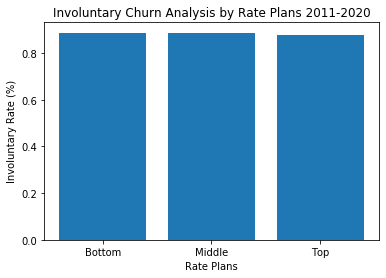

In [42]:
graph(ratePlan, 'Rate Plans')

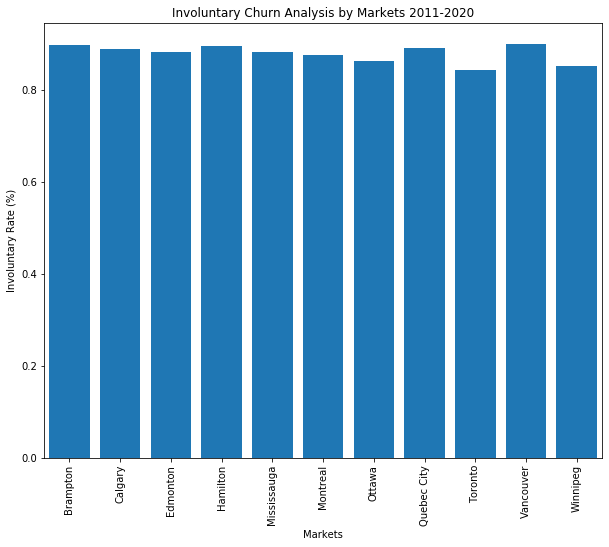

In [45]:
market['involuntaryRate'].plot.bar(figsize=(10,8))
graph(market, 'Markets')

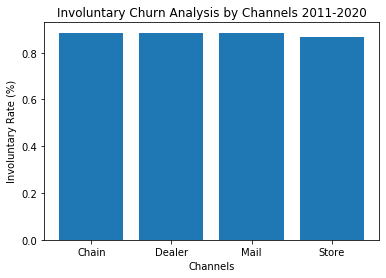

In [44]:
graph(channel, 'Channels')